In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from tqdm import tqdm_notebook as tqdm

In [2]:
path_to_train = './'
data = pd.read_csv(path_to_train+'train.csv')
train_dataset_info = []
for name, labels in zip(data['Id'], data['Target'].str.split(' ')):
    train_dataset_info.append({
        'path':os.path.join(path_to_train+'train/', name),
        'labels':np.array([int(label) for label in labels])})
train_dataset_info = np.array(train_dataset_info)

In [3]:
train_dataset_info

array([{'path': './train/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0', 'labels': array([16,  0])},
       {'path': './train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0', 'labels': array([7, 1, 2, 0])},
       {'path': './train/000a9596-bbc4-11e8-b2bc-ac1f6b6435d0', 'labels': array([5])},
       ...,
       {'path': './train/fff189d8-bbab-11e8-b2ba-ac1f6b6435d0', 'labels': array([7])},
       {'path': './train/fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0', 'labels': array([25,  2, 21])},
       {'path': './train/fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0', 'labels': array([2, 0])}],
      dtype=object)

In [16]:
%matplotlib inline
import cv2

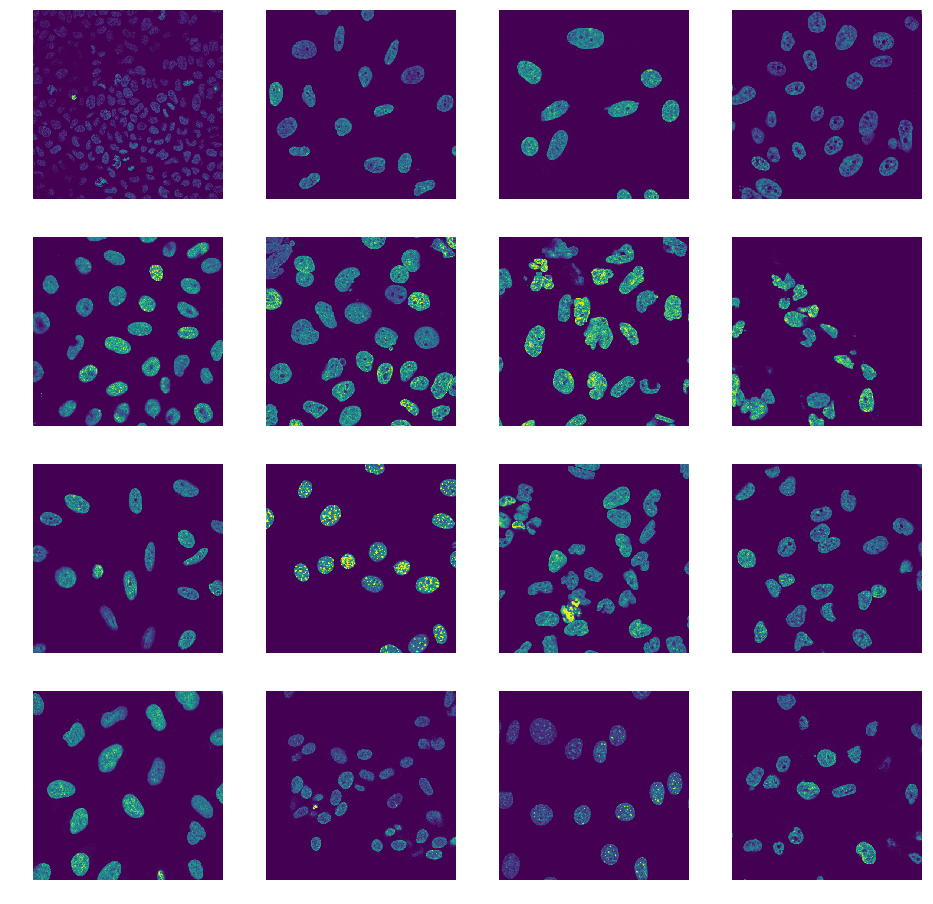

In [17]:
def display_imgs(x):
    columns = 4
    rows = 4
    fig=plt.figure(figsize=(columns*4, rows*4))
    for i in range(rows):
        for j in range(columns):
            idx = i+j*columns
            path=train_dataset_info[x+idx]['path']+'_blue.png'
            fig.add_subplot(rows, columns, idx+1)
            plt.axis('off')
            img=cv2.imread(path,0).astype('uint8')
            
            plt.imshow(img)
    plt.show()
display_imgs(0)

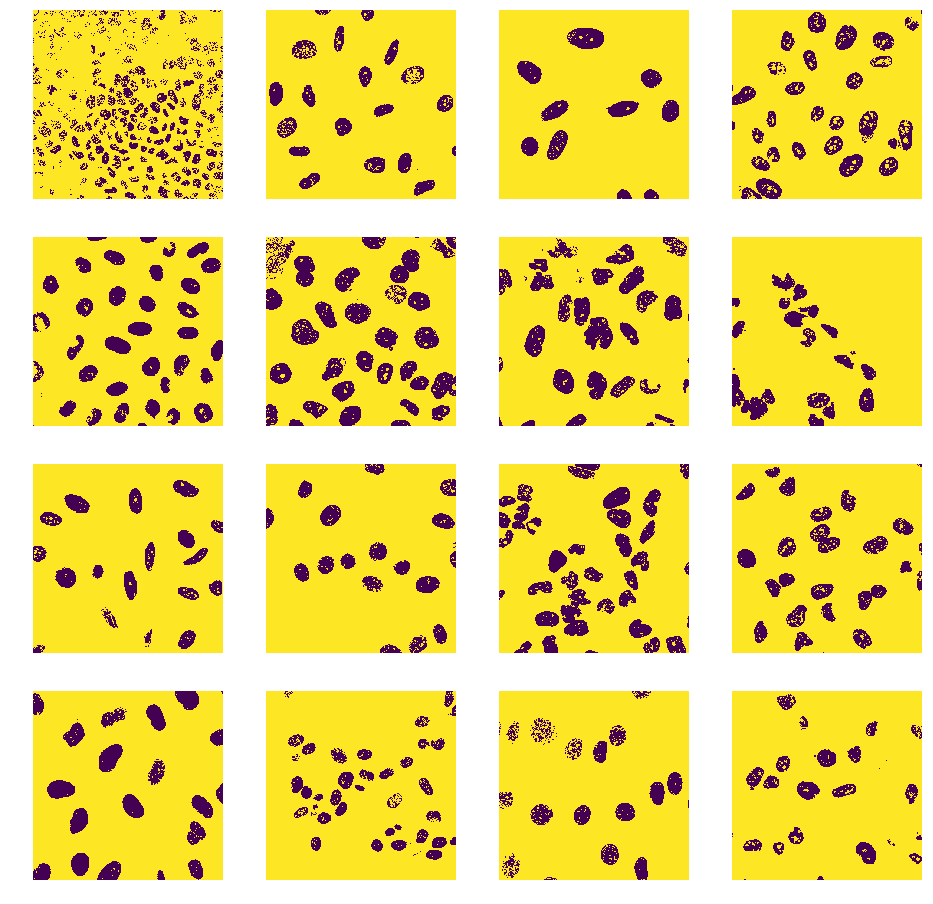

In [20]:
def display_imgs(x):
    columns = 4
    rows = 4
    fig=plt.figure(figsize=(columns*4, rows*4))
    for i in range(rows):
        for j in range(columns):
            idx = i+j*columns
            path=train_dataset_info[x+idx]['path']+'_blue.png'
            fig.add_subplot(rows, columns, idx+1)
            plt.axis('off')
            img=cv2.imread(path,0).astype('uint8')
            thresh,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
            plt.imshow(img)
    plt.show()
display_imgs(0)

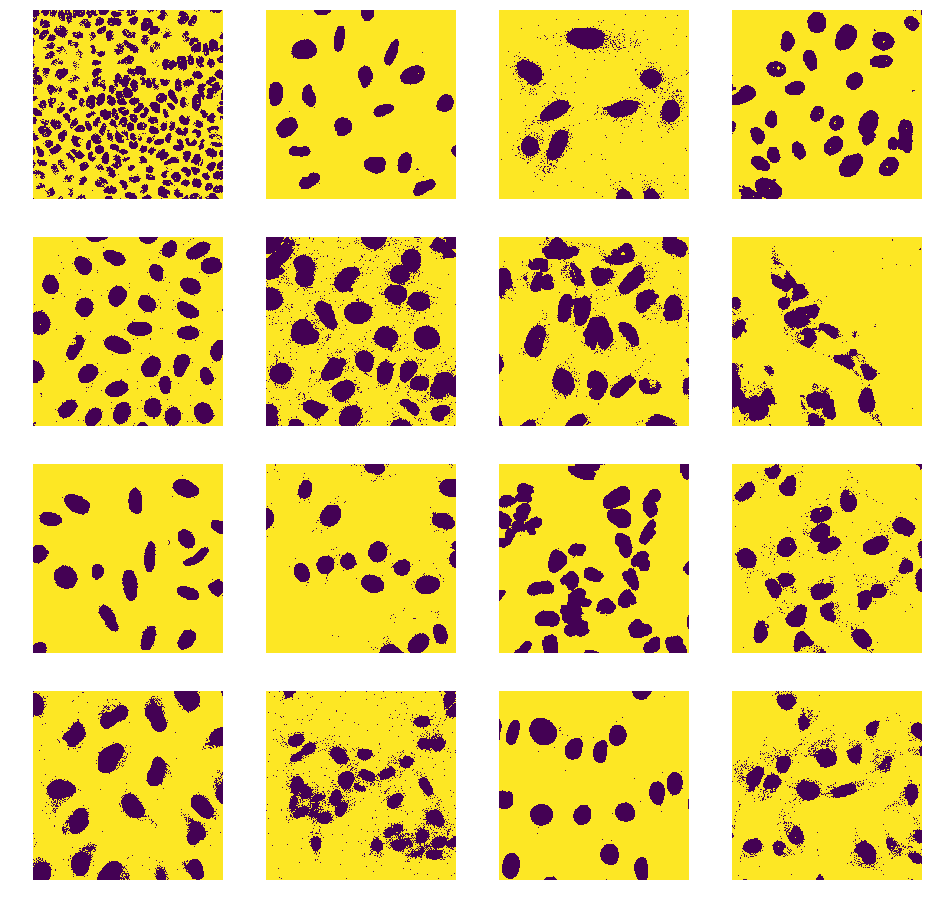

In [24]:
def display_imgs(x):
    columns = 4
    rows = 4
    fig=plt.figure(figsize=(columns*4, rows*4))
    for i in range(rows):
        for j in range(columns):
            idx = i+j*columns
            path=train_dataset_info[x+idx]['path']+'_blue.png'
            fig.add_subplot(rows, columns, idx+1)
            plt.axis('off')
            img=cv2.imread(path,0).astype('uint8')
            thresh,img = cv2.threshold(img,1,255,cv2.THRESH_BINARY_INV)
            plt.imshow(img)
    plt.show()
display_imgs(0)

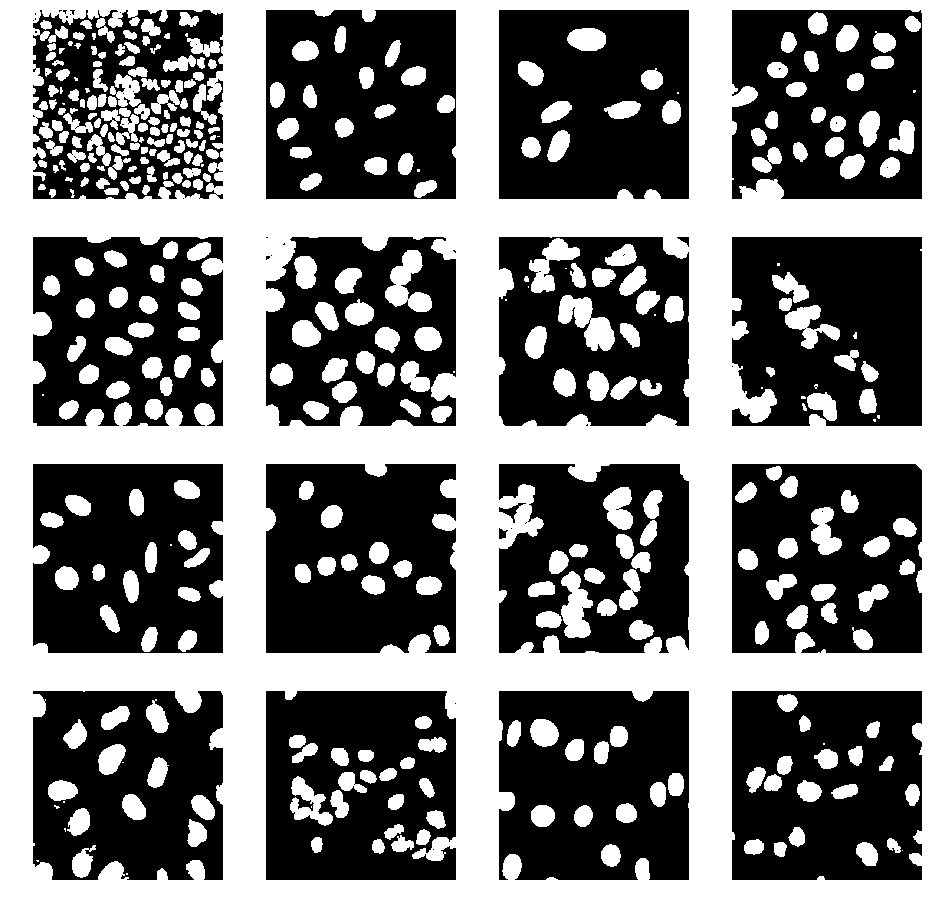

In [80]:
def display_imgs(x):
    columns = 4
    rows = 4
    fig=plt.figure(figsize=(columns*4, rows*4))
    for i in range(rows):
        for j in range(columns):
            idx = i+j*columns
            path=train_dataset_info[x+idx]['path']+'_blue.png'
            fig.add_subplot(rows, columns, idx+1)
            plt.axis('off')
            img=cv2.imread(path,0).astype('uint8')
            kernel = np.ones((2,2),np.uint8)
            opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel,iterations = 2)
            thresh,img = cv2.threshold(opening,1,255,cv2.THRESH_BINARY) 
            # closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel,iterations = 2)
            # モルフォロジー演算のDilationを使う
            # sure_bg = cv2.dilate(closing,kernel,iterations=2)
            sure_bg = cv2.dilate(img,kernel,iterations=2)
            plt.imshow(sure_bg,cmap='gray')
    plt.show()
display_imgs(0)

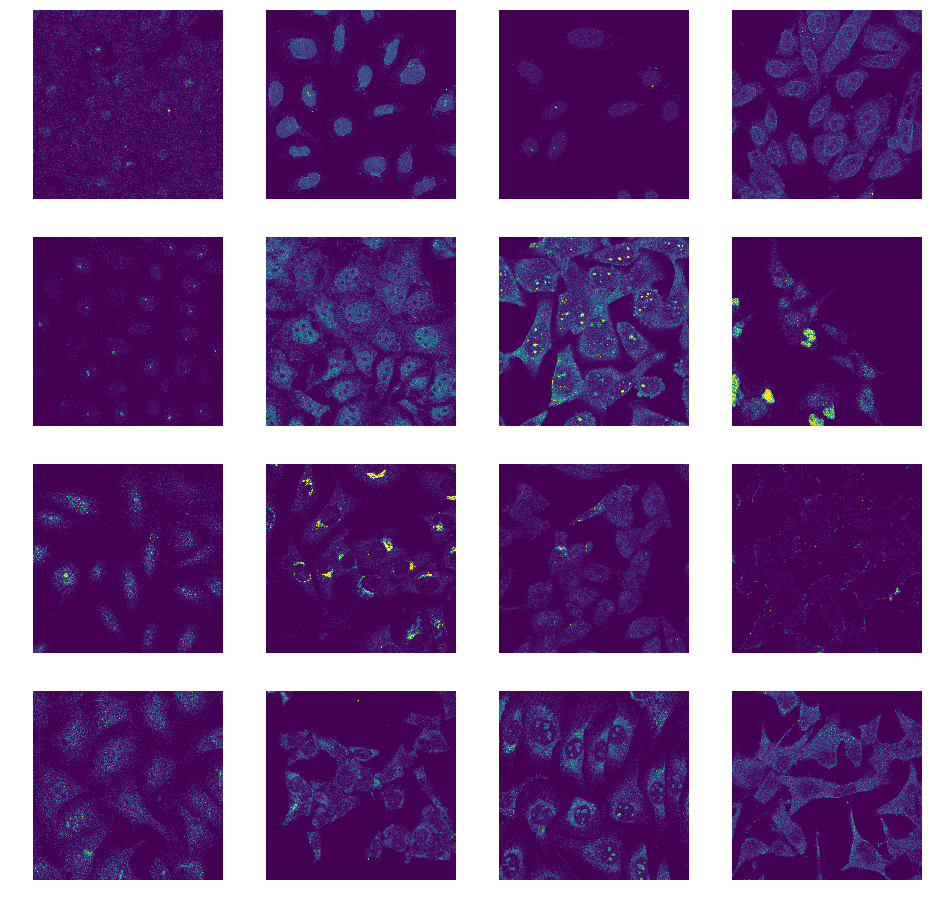

In [85]:
def display_imgs(x):
    columns = 4
    rows = 4
    fig=plt.figure(figsize=(columns*4, rows*4))
    for i in range(rows):
        for j in range(columns):
            idx = i+j*columns
            path=train_dataset_info[x+idx]['path']+'_green.png'
            fig.add_subplot(rows, columns, idx+1)
            plt.axis('off')
            img=cv2.imread(path,0).astype('uint8')
            
            
            plt.imshow(img)
    plt.show()
display_imgs(0)

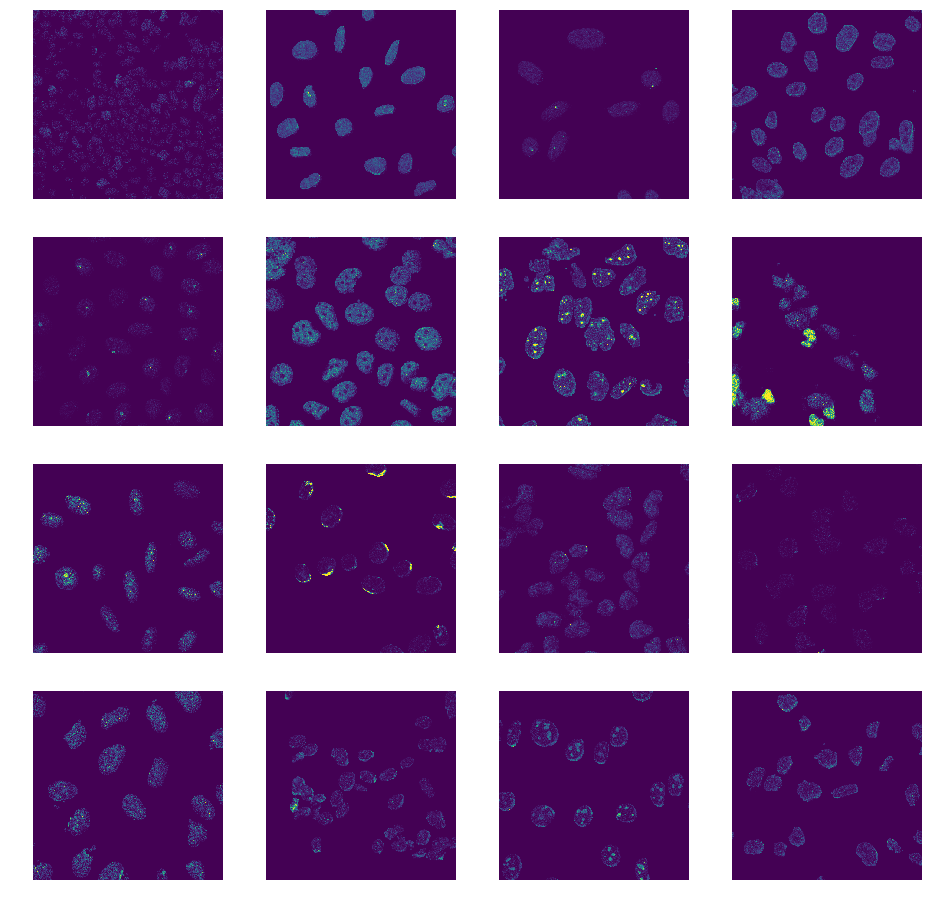

In [92]:
def display_imgs(x):
    columns = 4
    rows = 4
    fig=plt.figure(figsize=(columns*4, rows*4))
    for i in range(rows):
        for j in range(columns):
            idx = i+j*columns
            path=train_dataset_info[x+idx]['path']+'_blue.png'
            fig.add_subplot(rows, columns, idx+1)
            plt.axis('off')
            img=cv2.imread(path,0).astype('uint8')
            kernel = np.ones((2,2),np.uint8)
            opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel,iterations = 2)
            thresh,img = cv2.threshold(opening,1,255,cv2.THRESH_BINARY) 
            # closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel,iterations = 2)
            # モルフォロジー演算のDilationを使う
            # sure_bg = cv2.dilate(closing,kernel,iterations=2)
            mask = cv2.dilate(img,kernel,iterations=2)
            mask=np.where(mask>0,1,0).astype('uint8')
            
            target_path=train_dataset_info[x+idx]['path']+'_green.png'
            g_img=cv2.imread(target_path,0).astype('uint8')
            g_img*=mask
            plt.imshow(g_img)
    plt.show()
display_imgs(0)